# Check Response Functions
This notebooks checks the step response functions by numerically integrating the impulse response functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pastas as ps

### Gamma

In [3]:
ps.Gamma.impulse

In [ ]:
A = 5
n = 1.5
a = 50
p = [A, n, a]

gamma = ps.Gamma()
tmax = gamma.get_tmax(p)
t = np.arange(0, tmax)

step = gamma.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(gamma.impulse, 0, t[i], args=(p))[0]

In [ ]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Exponential

In [ ]:
ps.Exponential.impulse

In [ ]:
A = 5
a = 50
p = [A, a]

exponential = ps.Exponential()
tmax = exponential.get_tmax(p)
t = np.arange(0, tmax)

step = exponential.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(exponential.impulse, 0, t[i], args=(p))[0]

In [ ]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Hantush

In [ ]:
ps.Hantush.impulse

In [ ]:
A = 5
a = 50
b = 2
p = [A, a, b]

hantush = ps.Hantush()
tmax = hantush.get_tmax(p)
t = np.arange(0, tmax)

step = hantush.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(hantush.impulse, 0, t[i], args=(p))[0]

In [ ]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Polder

In [ ]:
ps.Polder.impulse

In [ ]:
A = 5
a = 100
b = 0.25
p = [A, a, b]

polder = ps.Polder()
tmax = polder.get_tmax(p)
t = np.arange(0, tmax)

step = polder.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(polder.impulse, 0, t[i], args=(p))[0]

In [ ]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Four-parameter function

In [ ]:
ps.FourParam.impulse

In [ ]:
A = 1 # impulse response implemented for A=1 only
n = 1.5
a = 50
b = 10
p = [A, n, a, b]

fourparam = ps.FourParam(quad=False) # use simple integration
tmax = fourparam.get_tmax(p)
t = np.arange(0, tmax)

step = fourparam.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(fourparam.impulse, 0, t[i], args=(p))[0]
stepnum = stepnum / quad(fourparam.impulse, 0, np.inf, args=p)[0] # four param is scaled at the end 

In [ ]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Double exponential function

In [ ]:
ps.DoubleExponential.impulse

In [ ]:
A = 5 # impulse response implemented for A=1 only
a = 10
b = 50
f = 0.4
p = [A, f, a, b]

doubexp = ps.DoubleExponential()
tmax = doubexp.get_tmax(p)
t = np.arange(0, tmax)

step = doubexp.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(doubexp.impulse, 0, t[i], args=(p))[0]

In [ ]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();

### Edelman

In [ ]:
#ps.Edelman.impulse

In [ ]:
# a = 10
# p = [a]
# # 
# edel = ps.Edelman()
# tmax = edel.get_tmax(p)
# t = np.arange(0, tmax)

# #step = edel.step(p)
# stepnum = np.zeros(len(t))
# for i in range(1, len(t)):
#     stepnum[i] = quad(edel.impulse, 1e-3, t[i], args=(p))[0]

In [ ]:
# plt.plot(t[1:], step, label="analytic")
# plt.plot(t, stepnum, "--", label="numerical")
# plt.xlabel("time (d)")
# plt.ylabel("step (m)")
# plt.grid()
# plt.legend();

### Kraijenhoff

#### Kraijenhoff van de Leur

##### Impulse

$ \theta(t) = \frac{4N}{\pi S} \sum_{n=1,3,5...}^\infty \left( \frac{1}{n} \exp{\left( {-n^2\frac{\pi^2T}{SL^2} t} \right)} \sin \left(\frac{n\pi x}{L}\right) \right) $

##### Step 

$ \Theta(t) = \frac{4 N}{\pi S} \sum_{n=1,3,5...}^\infty \frac{1}{n^3} \left(\frac{SL^2}{\pi^2 T} - \frac{SL^2}{\pi^2 T} \exp\left(-n^2\frac{\pi^2T}{SL^2}t\right)\right)  \sin \left(\frac{n\pi x}{L}\right) $

$ \Theta(t) = \frac{4 N L^2}{\pi^3 T} \sum_{n=1,3,5...}^\infty \frac{1}{n^3} \left(1 - \exp\left(-n^2\frac{\pi^2T}{SL^2}t\right)\right)  \sin \left(\frac{n\pi x}{L}\right)$

And $\sum_{n=1,3,5...}^\infty n = \sum_{n=0}^\infty (2n+1)$ gives:

$ \Theta(t) = \frac{4 N L^2}{\pi^3 T} \sum_{n=0}^\infty \frac{1}{(2n+1)^3} \left(1 - \exp\left(-(2n+1)^2\frac{\pi^2T}{SL^2}t)\right)\right)  \sin \left(\frac{(2n+1)\pi x}{L}\right)$


Kraijenhoff van de Leur takes $\frac{x}{L}=\frac{1}{2}$ as the middle of the domain. 

#### Bruggeman 133.15

##### Impulse

TODO calculate derivative of step response


##### Step 

$ \Theta(t) = \frac{-N}{2T}\left(x^2 - \frac{1}{4}L^2\right) - \frac{4NL^2}{\pi^3T} \sum_{n=0}^\infty
\frac{(-1)^n}{(2n + 1)^3} \cos\left(\frac{(2n+1)\pi x}{L}\right)
\exp\left(-\frac{(2n+1)^2\pi^2 Tt}{SL^2}\right)
$

$ \Theta(t) = \frac{-NL^2}{2T}\left(\left(\frac{x}{L}\right)^2 - \frac{1}{4}\right) - \frac{4NL^2}{\pi^3T} \sum_{n=0}^\infty
\frac{(-1)^n}{(2n + 1)^3} 
\exp\left(-\frac{(2n+1)^2\pi^2 Tt}{SL^2}\right) \cos\left(\frac{(2n+1)\pi x}{L}\right)
$

$ \Theta(t) = \frac{-NL^2}{2T}\left(\left(\frac{x}{L}\right)^2 - \tfrac{1}{4}\right) \left(1 - \frac{8}{\pi^3 \left(\frac{1}{4} - \left(\frac{x}{L}\right)^2\right)} \sum_{n=0}^\infty
\frac{(-1)^n}{(2n + 1)^3} 
\exp\left(-\frac{(2n+1)^2\pi^2 Tt}{SL^2}\right) \cos\left(\frac{(2n+1)\pi x}{L}\right) \right)
$

Note that $x=0$ is the middle of the domain for Bruggeman.

In Pastas the Bruggeman response function is computed and the parameters are transformed to:

Scale parameter:

$A = \frac{-NL^2}{2T}\left(\left(\frac{x}{L}\right)^2 - \tfrac{1}{4}\right)$

Reservoir coefficient (also known as $j$ in Kraijenhoff):

$a = \frac{SL^2}{\pi^2 T}$

Location in the domain:

$b = \frac{x}{L}$


Such that the step response becomes:

$ \Theta(t) = A\left(1 - \frac{8}{\pi^3(\frac{1}{4} - b^2)} \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)^3} \cos\left((2n+1)\pi b\right)\exp\left(-\frac{(2n+1)^2t}{a}\right) \right)$

Taking the derivative gives the impulse response:

In [2]:
ps.Kraijenhoff.impulse

In [3]:
A = 1
a = 5
b = 0.0
p = [A, a, b]

khoff = ps.Kraijenhoff()
tmax = khoff.get_tmax(p)
t = np.arange(0, tmax)

step = khoff.step(p)
# stepnum_khof = np.zeros(len(t))
stepnum_brug = np.zeros(len(t))

for i in range(1, len(t)):
    stepnum_brug[i] = quad(khoff.impulse, 0, t[i], args=(p))[0]

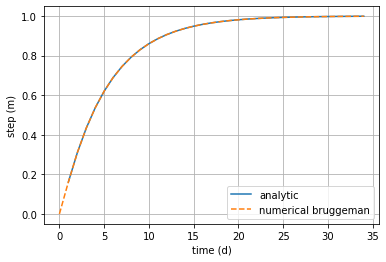

In [4]:
plt.plot(t[1:], step, label="analytic")
# plt.plot(t, stepnum_khof, "--", label="numerical kraijenhoff")
plt.plot(t, stepnum_brug, "--", label="numerical bruggeman")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
plt.legend();